Modelling

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#import dataset
df = pd.read_csv("/content/balanced_dataset_shopee.csv")
df.head()

,Ulasan,Compound_Score,Sentiments
0,"wai g, don't take care of my gang, I'm playing...",-0.2091,Negatif
1,criticism,-0.4404,Negatif
2,criticism,-0.4404,Negatif
3,full help needed,0.4019,Positif
4,why is shopee paylater still open,0.0000,Netral


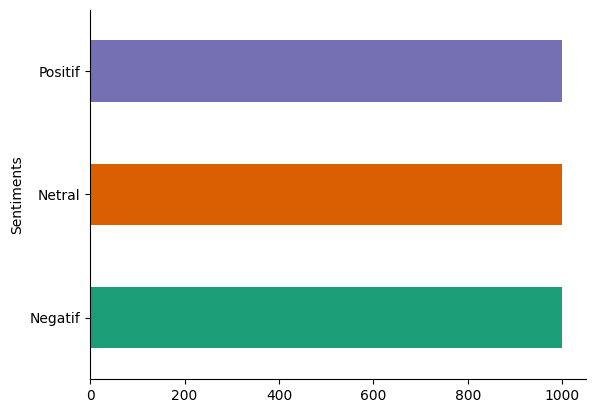

In [ ]:
# @title Sentiments

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiments').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Klasifikasi Rf dengan TF-IDF

RASIO PENGUJIAN
90:10
80:20
70:30
60:40
50:50
40:60
30:70
20:80
10:90

**RASIO 90:10**

Random Forest Accuracy: 0.85
Random Forest Precision: 0.8528285064537232
Random Forest Recall: 0.85
Random Forest F1 Score: 0.849718588160306
Confusion Matrix for Random Forest:
[[91 17  6]
 [ 7 93  2]
 [ 8  5 71]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.86      0.80      0.83       114
      Netral       0.81      0.91      0.86       102
     Positif       0.90      0.85      0.87        84

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



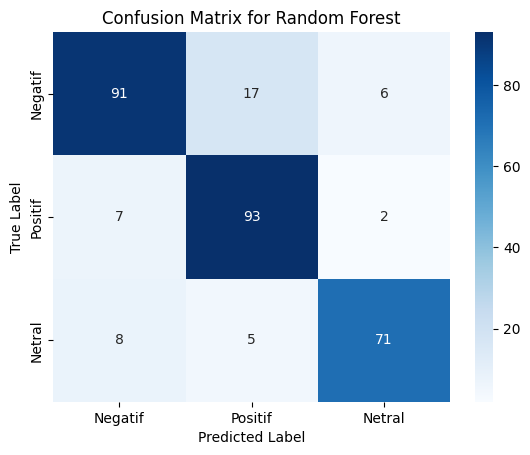

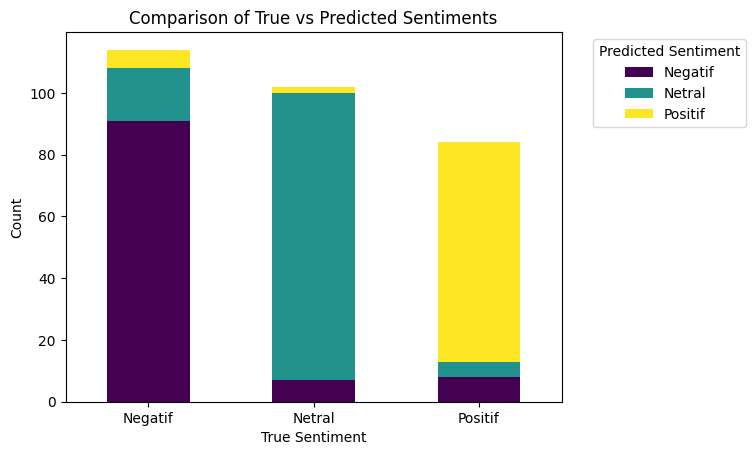

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (90:10)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.10,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 80:20**

Random Forest Accuracy: 0.8516666666666667
Random Forest Precision: 0.856272874934513
Random Forest Recall: 0.8516666666666667
Random Forest F1 Score: 0.8526992549291417
Confusion Matrix for Random Forest:
[[164  24   7]
 [ 21 183   5]
 [ 26   6 164]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.78      0.84      0.81       195
      Netral       0.86      0.88      0.87       209
     Positif       0.93      0.84      0.88       196

    accuracy                           0.85       600
   macro avg       0.86      0.85      0.85       600
weighted avg       0.86      0.85      0.85       600



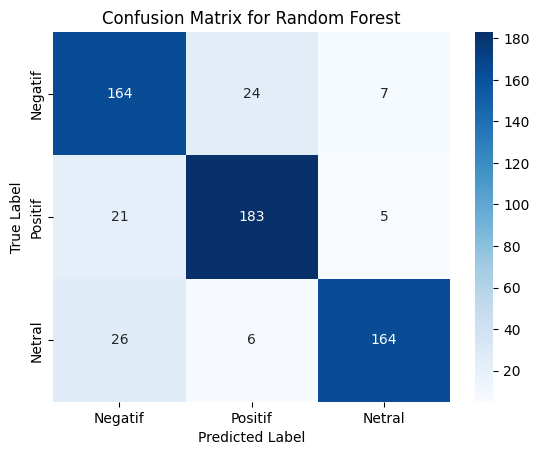

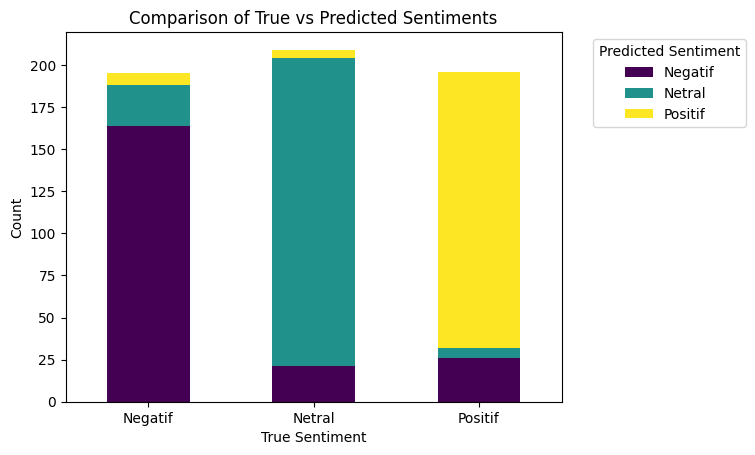

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.20,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 70:30**

Random Forest Accuracy: 0.84
Random Forest Precision: 0.8462369244337292
Random Forest Recall: 0.84
Random Forest F1 Score: 0.8408324619495758
Confusion Matrix for Random Forest:
[[244  30  13]
 [ 30 260   8]
 [ 43  20 252]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.77      0.85      0.81       287
      Netral       0.84      0.87      0.86       298
     Positif       0.92      0.80      0.86       315

    accuracy                           0.84       900
   macro avg       0.84      0.84      0.84       900
weighted avg       0.85      0.84      0.84       900



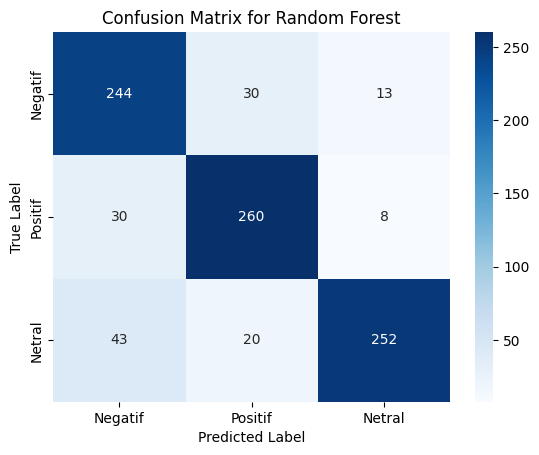

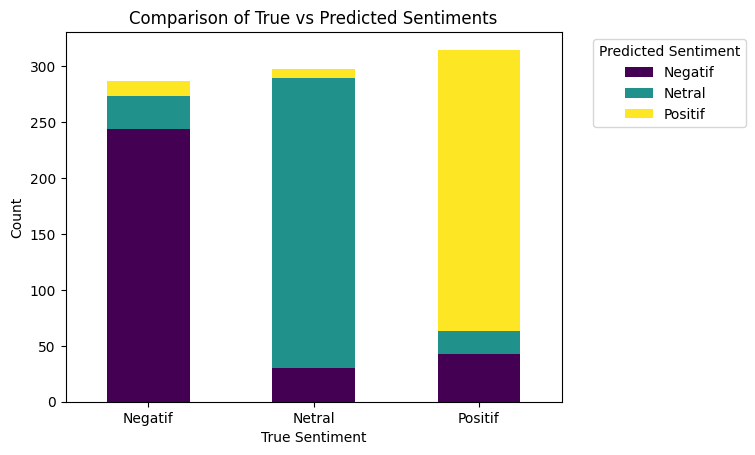

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (70:30)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.30,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 60:40**

Random Forest Accuracy: 0.8275
Random Forest Precision: 0.8332756353893314
Random Forest Recall: 0.8275
Random Forest F1 Score: 0.8280652255990859
Confusion Matrix for Random Forest:
[[327  48  21]
 [ 37 336  11]
 [ 60  30 330]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.77      0.83      0.80       396
      Netral       0.81      0.88      0.84       384
     Positif       0.91      0.79      0.84       420

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



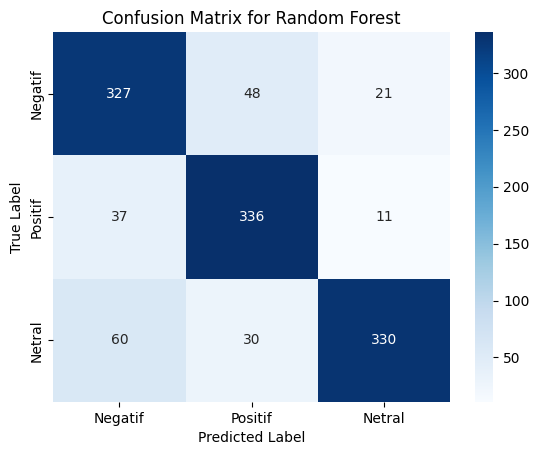

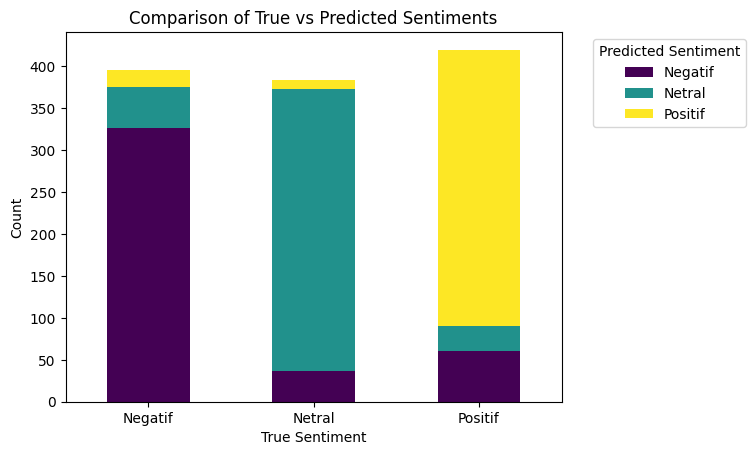

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (60:40)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.40,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 50:50**

Random Forest Accuracy: 0.8193333333333334
Random Forest Precision: 0.8256964181688172
Random Forest Recall: 0.8193333333333334
Random Forest F1 Score: 0.819314996617514
Confusion Matrix for Random Forest:
[[396  80  21]
 [ 30 438  21]
 [ 75  44 395]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.79      0.80      0.79       497
      Netral       0.78      0.90      0.83       489
     Positif       0.90      0.77      0.83       514

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.83      0.82      0.82      1500



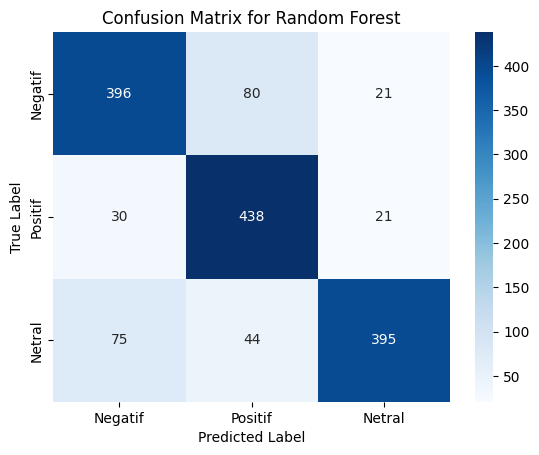

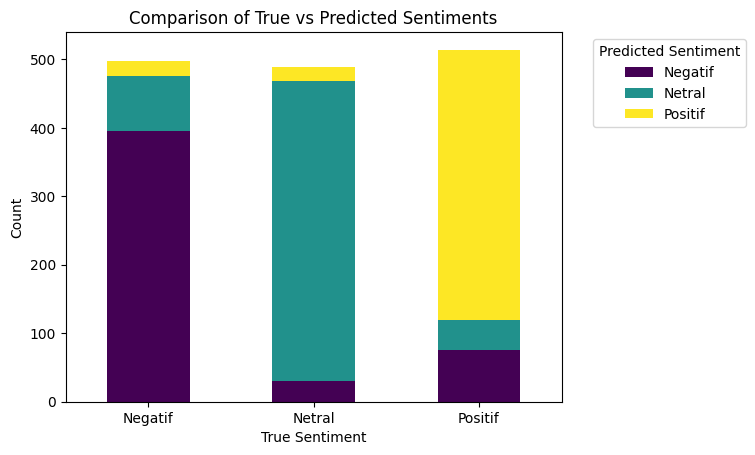

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (50:50)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.50,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 40:60**

Random Forest Accuracy: 0.8166666666666667
Random Forest Precision: 0.8224678262143161
Random Forest Recall: 0.8166666666666667
Random Forest F1 Score: 0.8165964074519638
Confusion Matrix for Random Forest:
[[476 100  33]
 [ 38 521  23]
 [ 80  56 473]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.80      0.78      0.79       609
      Netral       0.77      0.90      0.83       582
     Positif       0.89      0.78      0.83       609

    accuracy                           0.82      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.82      0.82      0.82      1800



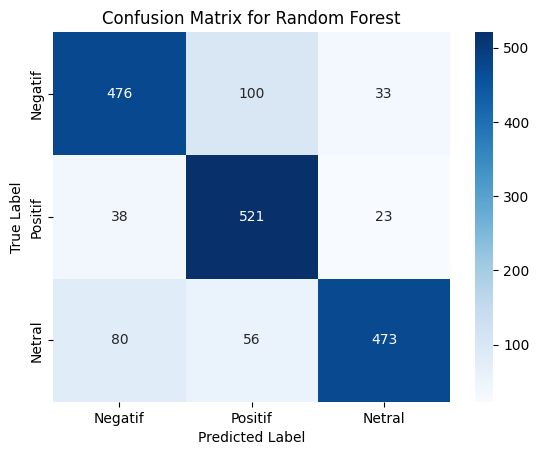

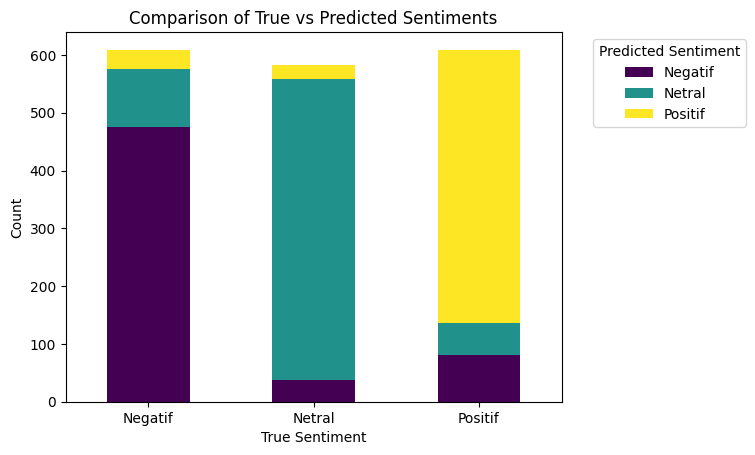

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (40:60)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.60,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 30:70**

Random Forest Accuracy: 0.7919047619047619
Random Forest Precision: 0.7948309620982281
Random Forest Recall: 0.7919047619047619
Random Forest F1 Score: 0.7917525676937444
Confusion Matrix for Random Forest:
[[529 123  55]
 [ 54 584  47]
 [ 90  68 550]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.79      0.75      0.77       707
      Netral       0.75      0.85      0.80       685
     Positif       0.84      0.78      0.81       708

    accuracy                           0.79      2100
   macro avg       0.79      0.79      0.79      2100
weighted avg       0.79      0.79      0.79      2100



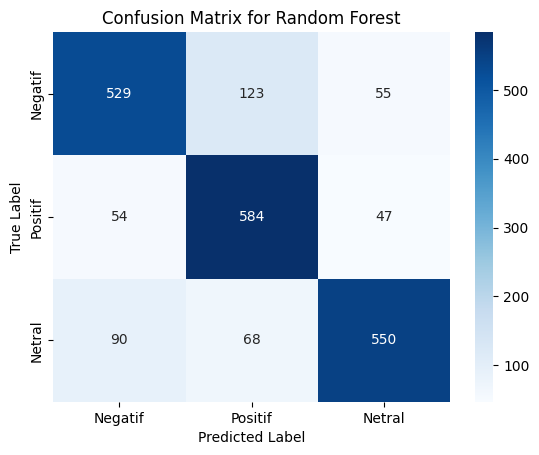

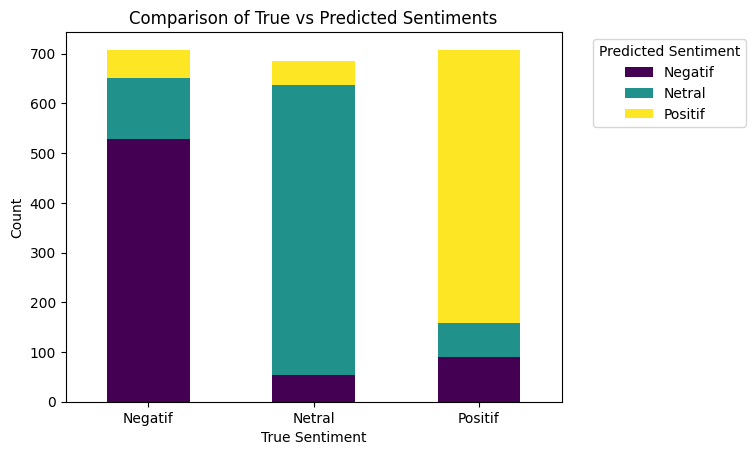

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (30:70)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.70,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 20:80**

Random Forest Accuracy: 0.7595833333333334
Random Forest Precision: 0.765508690054573
Random Forest Recall: 0.7595833333333334
Random Forest F1 Score: 0.7595061677912515
Confusion Matrix for Random Forest:
[[592 151  51]
 [ 71 648  62]
 [150  92 583]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.73      0.75      0.74       794
      Netral       0.73      0.83      0.78       781
     Positif       0.84      0.71      0.77       825

    accuracy                           0.76      2400
   macro avg       0.76      0.76      0.76      2400
weighted avg       0.77      0.76      0.76      2400



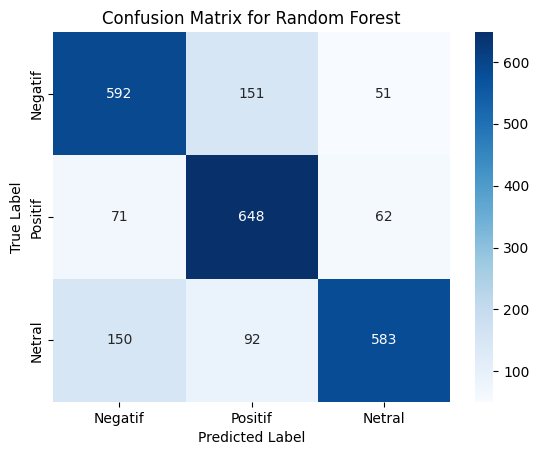

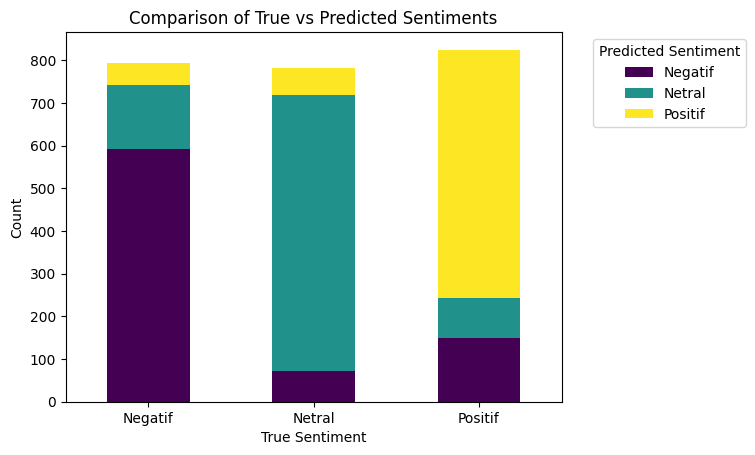

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (20:80)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.80,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 10:90**

Random Forest Accuracy: 0.74
Random Forest Precision: 0.7603010229825675
Random Forest Recall: 0.74
Random Forest F1 Score: 0.738932047335754
Confusion Matrix for Random Forest:
[[647 193  50]
 [ 86 772  32]
 [148 193 579]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.73      0.73      0.73       890
      Netral       0.67      0.87      0.75       890
     Positif       0.88      0.63      0.73       920

    accuracy                           0.74      2700
   macro avg       0.76      0.74      0.74      2700
weighted avg       0.76      0.74      0.74      2700



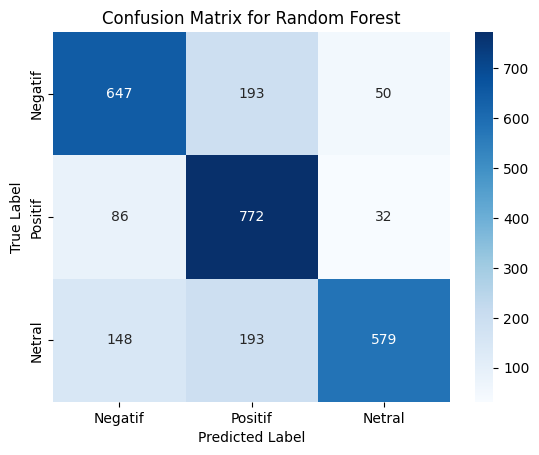

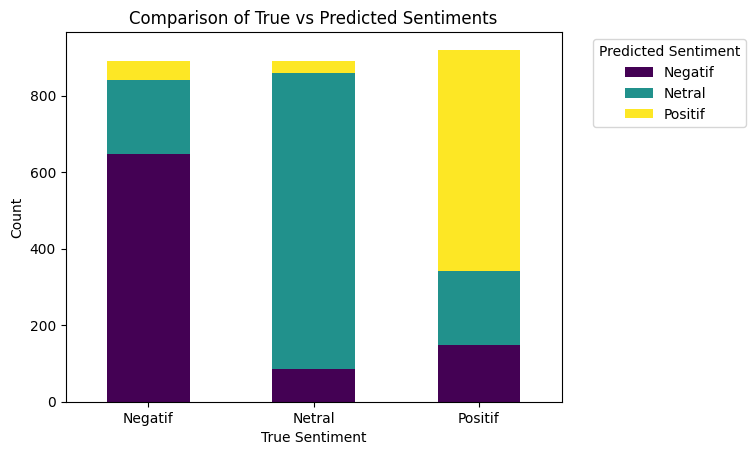

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (10:90)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.90,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**MENAMPILKAN JUMLAH SENTIMEN**

In [ ]:
# Menampilkan jumlah sentimen positif dan negatif
jumlah_sentimen = df['Sentiments'].value_counts()
print("Jumlah Sentimen Positif, Negatif dan Netral:")
print(jumlah_sentimen)

Jumlah Sentimen Positif, Negatif dan Netral:
Sentiments
Negatif    1000
Positif    1000
Netral     1000
Name: count, dtype: int64


**WORDCLOUD**

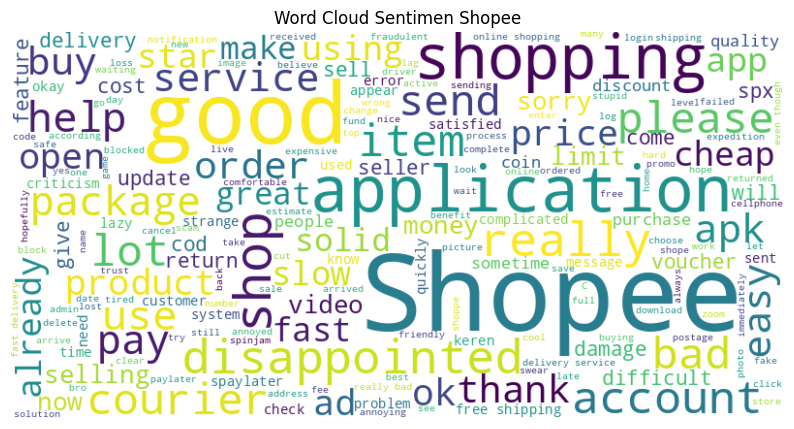

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk visualisasi word cloud
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Contoh data untuk visualisasi word cloud
all_comments = ' '.join(df['Ulasan'])

# Visualisasi word cloud untuk komentar
plot_word_cloud(all_comments, 'Word Cloud Sentimen Shopee')

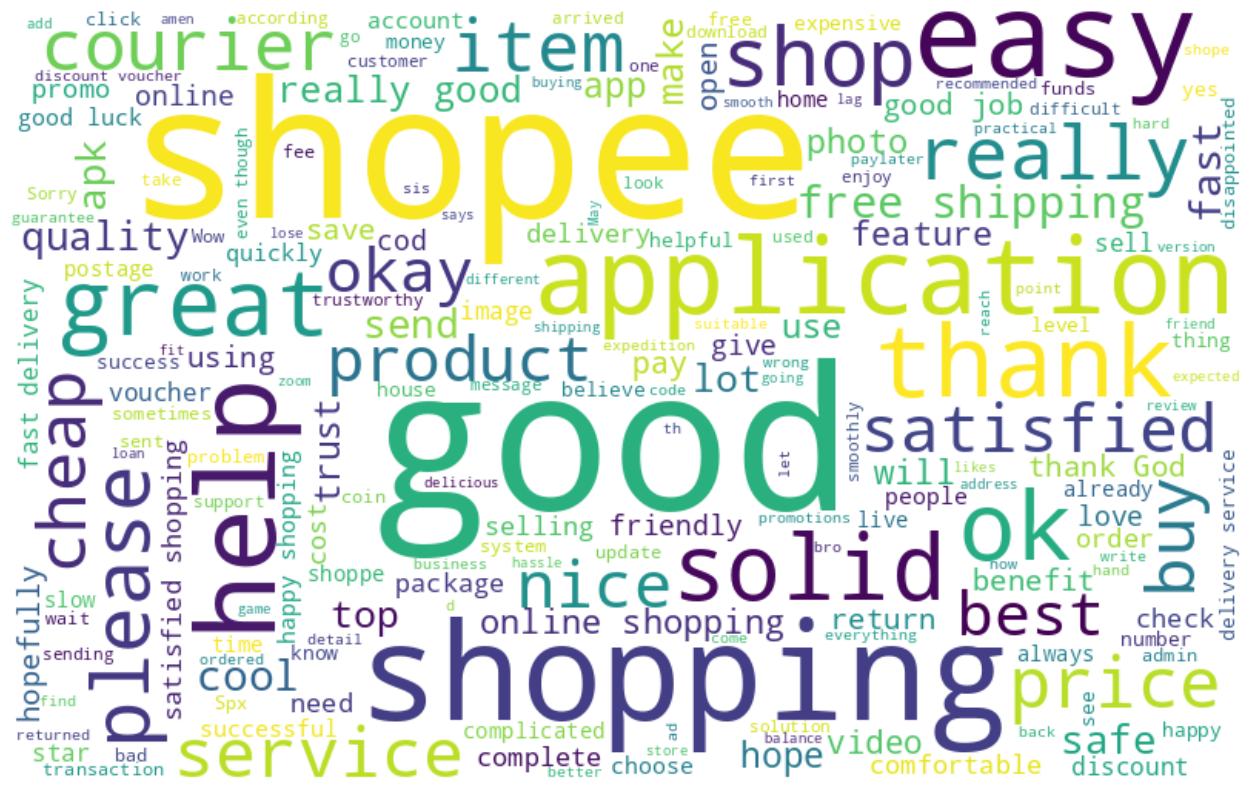

In [ ]:
df_p=df[df['Sentiments']== "Positif"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

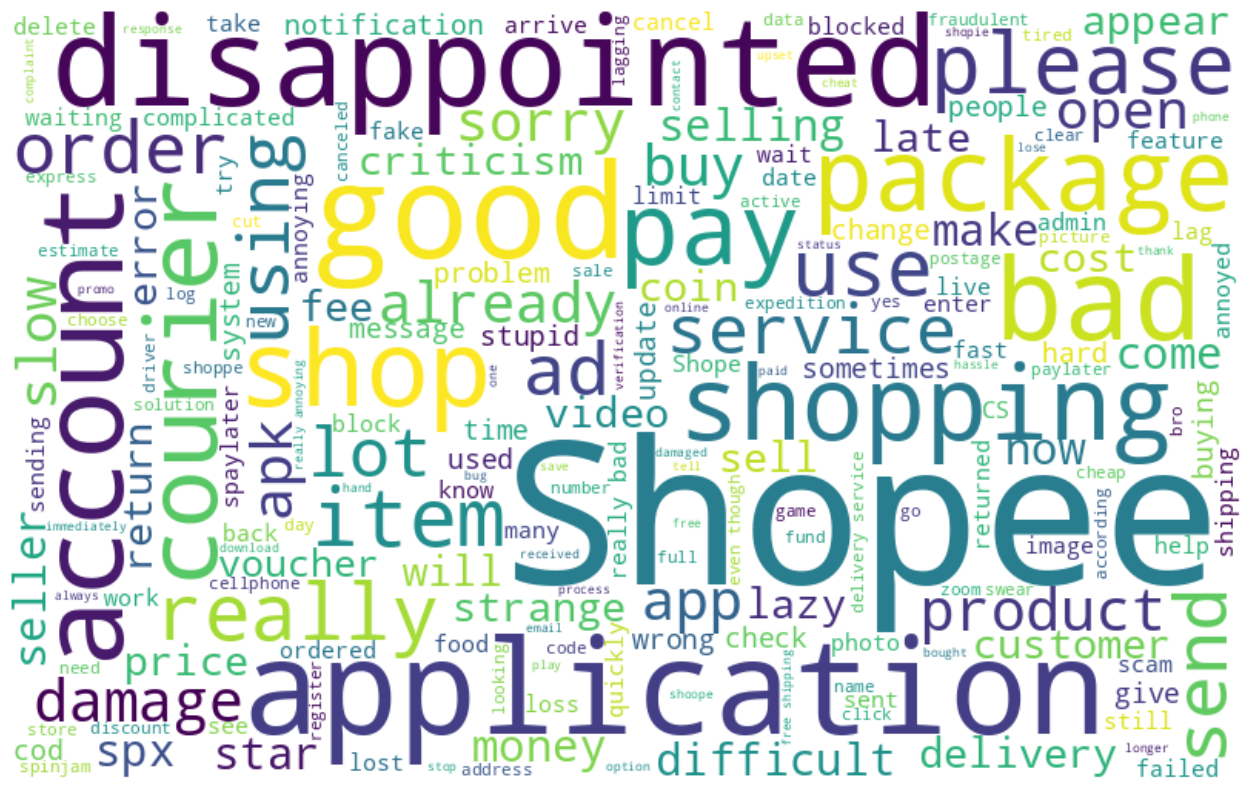

In [ ]:
df_p=df[df['Sentiments']== "Negatif"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

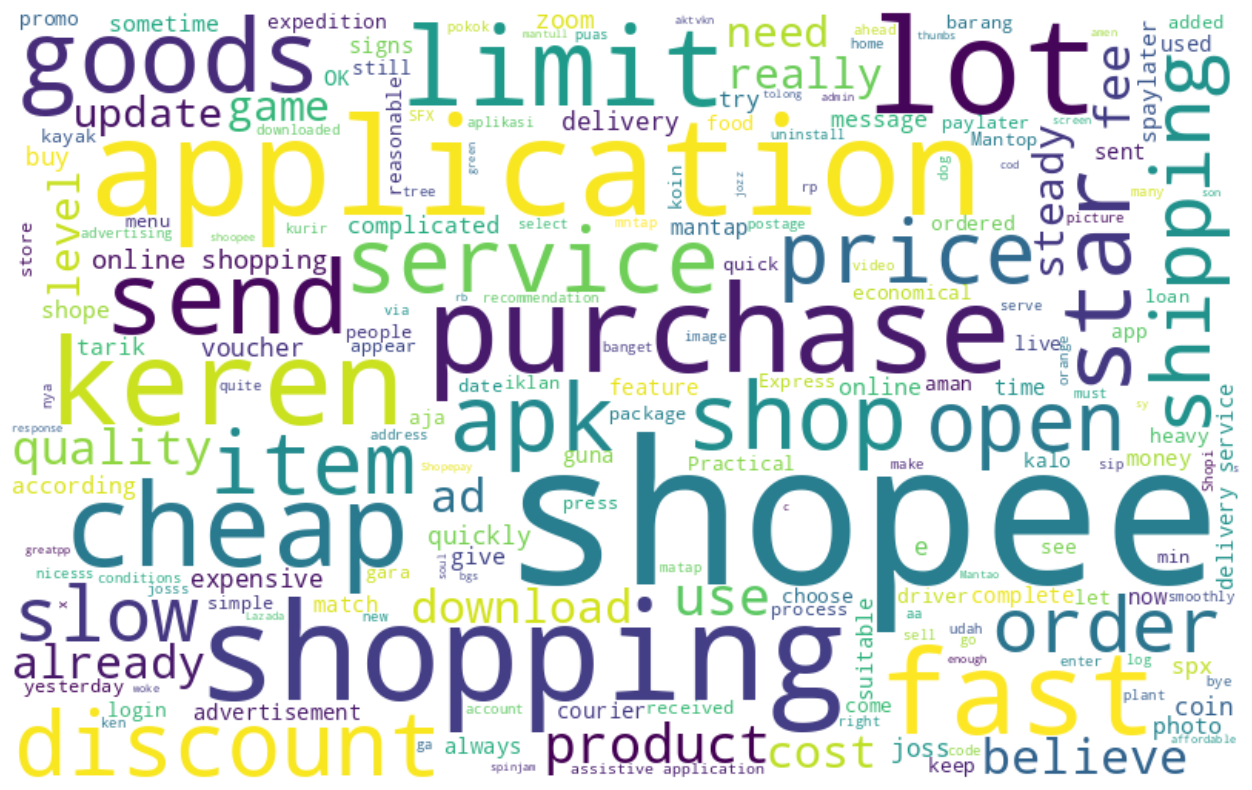

In [ ]:
df_p=df[df['Sentiments']== "Netral"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');